In [9]:
import re
import numpy as np
import os
import matplotlib.pyplot as plt

In [10]:
path = ['checkpoints_new/asr_att_joint_train/','checkpoints_new/asr_att_mct_joint_train','checkpoints_new/asr_conf_joint_train','checkpoints_new/asr_conf_mct_joint_train']

# ASR joint train no gan

In [48]:
# load loss
def plot_att(path):
    path = os.path.join(path,'main.log')
    with open(path,'r') as f:
        asr_att_loss = []
        asr_ctc_loss = []
        enhance_loss = []
        total_loss = []
        for i in f.readlines():
            # enhance loss
            enhance_loss_ret = re.findall('train\/enhance_loss: .+?\s+?\((.+?)\)',i)
            if len(enhance_loss_ret) == 1:
                enhance_loss.append(enhance_loss_ret[0])

            # asr attention loss
            asr_att_loss_ret = re.findall('train\/loss_att: .+?\s+?\((.+?)\)',i)
            if len(asr_att_loss_ret) == 1:
                asr_att_loss.append(asr_att_loss_ret[0])

            # asr ctc loss
            asr_ctc_loss_ret = re.findall('train\/loss_ctc: .+?\s+?\((.+?)\)',i)
            if len(asr_ctc_loss_ret) == 1:
                asr_ctc_loss.append(asr_ctc_loss_ret[0])

            if asr_att_loss_ret and asr_ctc_loss_ret:
                # total loss = alpha * enhance_loss + L_asr
                total_loss_ret = re.findall('train\/loss: .+?\s+?\((.+?)\)',i)
                if len(total_loss_ret) == 1:
                    total_loss.append(total_loss_ret[0])

    mtlalpha = 0.1
    asr_att_loss = np.array(asr_att_loss,dtype = "float32")
    asr_ctc_loss = np.array(asr_ctc_loss,dtype = "float32")

    asr_loss = mtlalpha * asr_ctc_loss + (1-mtlalpha) * asr_att_loss
    enhance_loss = np.array(enhance_loss,dtype = "float32")
    total_loss = np.array(total_loss,dtype = "float32")
    t = range(0,len(asr_loss)*500,500)
    plt.figure(figsize=(10,7))
    plt.title('Attention mct ASR joint train without GAN model')
    plt.plot(t[::10], asr_loss[::10],label='asr_loss',marker='x')  
    plt.plot(t[::10], enhance_loss[::10], label='enhance_loss',marker='x')  
    plt.plot(t[::10], total_loss[::10],label='total_loss',marker='x')
    plt.legend()
    plt.show()

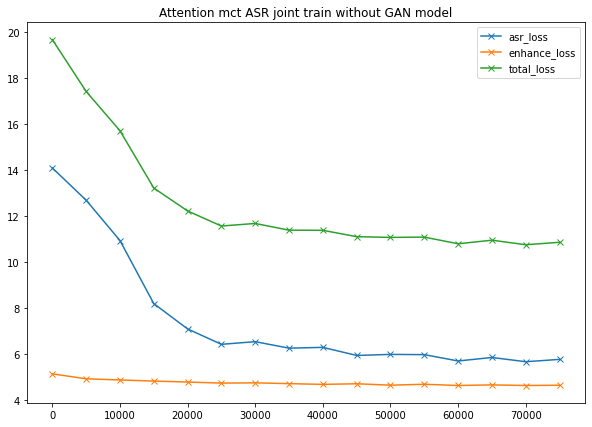

In [49]:

#for pa in path:
pa = path[1]
plot_att(pa)

# ASR joint train with gan

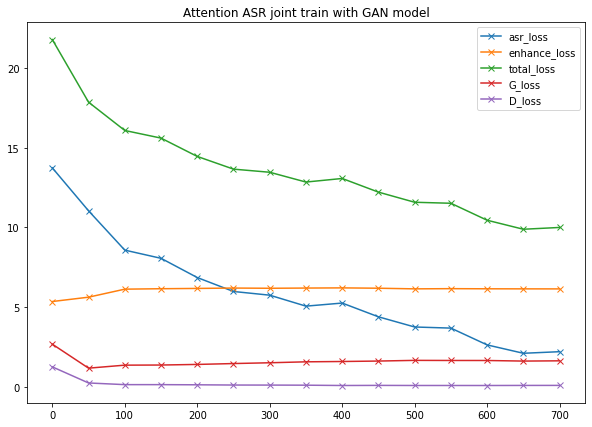

In [126]:
# load loss
with open('joint_train_gan.log','r') as f:
    asr_att_loss = []
    asr_ctc_loss = []
    D_loss = []
    G_loss = []
    enhance_loss = []
    total_loss = []
    for i in f.readlines():
        # D loss
        D_loss_ret = re.findall('train\/loss_D: .+?\s+?\((.+?)\)',i)
        if len(D_loss_ret) == 1:
            D_loss.append(D_loss_ret[0])
        
        # D loss
        G_loss_ret = re.findall('train\/gan_loss: .+?\s+?\((.+?)\)',i)
        if len(G_loss_ret) == 1:
            G_loss.append(G_loss_ret[0])
        
        # enhance loss
        enhance_loss_ret = re.findall('train\/enhance_loss: .+?\s+?\((.+?)\)',i)
        if len(enhance_loss_ret) == 1:
            enhance_loss.append(enhance_loss_ret[0])
        
        # asr attention loss
        asr_att_loss_ret = re.findall('train\/loss_att: .+?\s+?\((.+?)\)',i)
        if len(asr_att_loss_ret) == 1:
            asr_att_loss.append(asr_att_loss_ret[0])
        
        # asr ctc loss
        asr_ctc_loss_ret = re.findall('train\/loss_ctc: .+?\s+?\((.+?)\)',i)
        if len(asr_ctc_loss_ret) == 1:
            asr_ctc_loss.append(asr_ctc_loss_ret[0])
            
        if asr_att_loss_ret and asr_ctc_loss_ret:
            # total loss = alpha * enhance_loss + L_asr
            total_loss_ret = re.findall('train\/loss: .+?\s+?\((.+?)\)',i)
            if len(total_loss_ret) == 1:
                total_loss.append(total_loss_ret[0])

mtlalpha = 0.1
# asr loss
asr_att_loss = np.array(asr_att_loss,dtype = "float32")
asr_ctc_loss = np.array(asr_ctc_loss,dtype = "float32")
asr_loss = mtlalpha * asr_ctc_loss + (1-mtlalpha) * asr_att_loss
# enhance loss
enhance_loss = np.array(enhance_loss,dtype = "float32")
# total loss
total_loss = np.array(total_loss,dtype = "float32")
# G loss
G_loss = np.array(G_loss,dtype = "float32")
# D loss
D_loss = np.array(D_loss,dtype = "float32")


t = range(0,len(asr_loss))
plt.figure(figsize=(10,7))
plt.title('Attention ASR joint train with GAN model')
plt.plot(t[::50], asr_loss[::50],label='asr_loss',marker='x')  
plt.plot(t[::50], enhance_loss[::50], label='enhance_loss',marker='x')  
plt.plot(t[::50], total_loss[::50],label='total_loss',marker='x')
plt.plot(t[::50], G_loss[::50],label='G_loss',marker='x')
plt.plot(t[::50], D_loss[::50],label='D_loss',marker='x')
plt.legend()
plt.show()

# Transformer joint train no gan

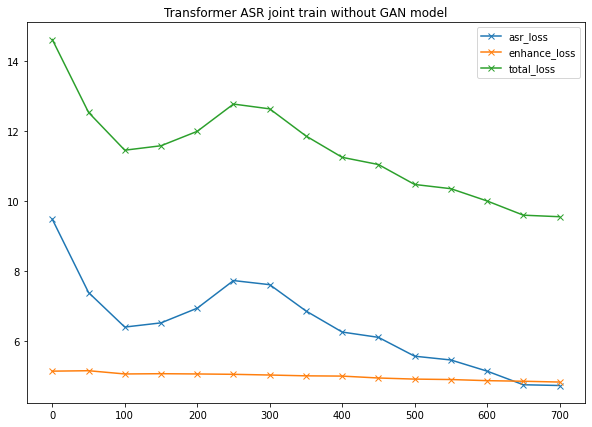

In [128]:
# load loss
with open('trans_joint_train.log','r') as f:
    asr_loss = []
    enhance_loss = []
    total_loss = []
    for i in f.readlines():
        # enhance loss
        enhance_loss_ret = re.findall('train\/enhance_loss: .+?\s+?\((.+?)\)',i)
        if len(enhance_loss_ret) == 1:
            enhance_loss.append(enhance_loss_ret[0])
        
        # asr ctc loss
        asr_loss_ret = re.findall('train\/asr_loss: .+?\s+?\((.+?)\)',i)
        if len(asr_loss_ret) == 1:
            asr_loss.append(asr_loss_ret[0])
            

        total_loss_ret = re.findall('train\/loss: .+?\s+?\((.+?)\)',i)
        if len(total_loss_ret) == 1:
            total_loss.append(total_loss_ret[0])
            


asr_loss = np.array(asr_loss,dtype = "float32")
enhance_loss = np.array(enhance_loss,dtype = "float32")
total_loss = np.array(total_loss,dtype = "float32")

t = range(0,len(asr_loss))
plt.figure(figsize=(10,7))
plt.title('Transformer ASR joint train without GAN model')
plt.plot(t[::50], asr_loss[::50],label='asr_loss',marker='x')  
plt.plot(t[::50], enhance_loss[::50], label='enhance_loss',marker='x')  
plt.plot(t[::50], total_loss[::50],label='total_loss',marker='x')
plt.legend()
plt.show()

# Transformer joint train with gan

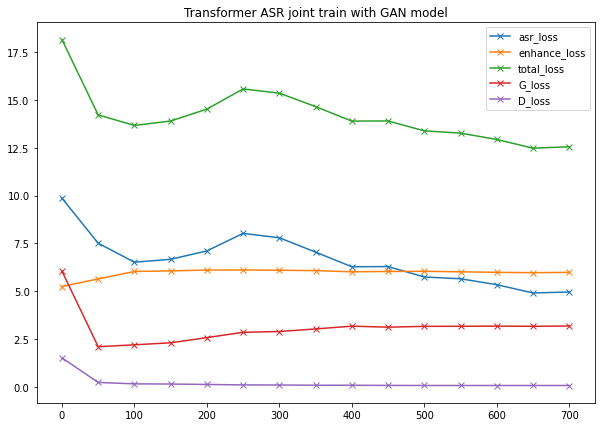

In [130]:
# load loss
with open('trans_joint_train_gan.log','r') as f:
    asr_loss = []
    enhance_loss = []
    total_loss = []
    D_loss = []
    G_loss = []
    for i in f.readlines():
        # D loss
        D_loss_ret = re.findall('train\/loss_D: .+?\s+?\((.+?)\)',i)
        if len(D_loss_ret) == 1:
            D_loss.append(D_loss_ret[0])
        
        # D loss
        G_loss_ret = re.findall('train\/gan_loss: .+?\s+?\((.+?)\)',i)
        if len(G_loss_ret) == 1:
            G_loss.append(G_loss_ret[0])
            
        # enhance loss
        enhance_loss_ret = re.findall('train\/enhance_loss: .+?\s+?\((.+?)\)',i)
        if len(enhance_loss_ret) == 1:
            enhance_loss.append(enhance_loss_ret[0])
        
        # asr ctc loss
        asr_loss_ret = re.findall('train\/asr_loss: .+?\s+?\((.+?)\)',i)
        if len(asr_loss_ret) == 1:
            asr_loss.append(asr_loss_ret[0])
            

        total_loss_ret = re.findall('train\/loss: .+?\s+?\((.+?)\)',i)
        if len(total_loss_ret) == 1:
            total_loss.append(total_loss_ret[0])

# asr loss
asr_loss =np.array(asr_loss,dtype = "float32")
# enhance loss
enhance_loss = np.array(enhance_loss,dtype = "float32")
# total loss
total_loss = np.array(total_loss,dtype = "float32")
# G loss
G_loss = np.array(G_loss,dtype = "float32")
# D loss
D_loss = np.array(D_loss,dtype = "float32")


t = range(0,len(asr_loss))
plt.figure(figsize=(10,7))
plt.title('Transformer ASR joint train with GAN model')
plt.plot(t[::50], asr_loss[::50],label='asr_loss',marker='x')  
plt.plot(t[::50], enhance_loss[::50], label='enhance_loss',marker='x')  
plt.plot(t[::50], total_loss[::50],label='total_loss',marker='x')
plt.plot(t[::50], G_loss[::50],label='G_loss',marker='x')
plt.plot(t[::50], D_loss[::50],label='D_loss',marker='x')
plt.legend()
plt.show()